## Importation des modules

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Collecte des données 

In [598]:
# Collecte des données
file_name = 'data_sales.csv'
data = pd.DataFrame()
data = pd.read_csv(file_name, sep=';')

In [599]:
data.head()

,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
0,NaN,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
1,NaN,NaN,BATTERIE 45 AMP,1,60,60
2,NaN,NaN,COUSSINETS BIELLE 3E/5E,1,15,15
3,NaN,NaN,RETIEN D'HUILE 5AF,1,5,5
4,NaN,NaN,HUILE CITROL SAE 50 5L,6,"8,67","52,02"


In [600]:
data.dtypes

code_vente                float64
date_vente                 object
nom_de_la_piece            object
quantite                    int64
prix_unitaire_de_vente     object
prix_total_de_vente        object
dtype: object

## Nettoyage des données et Préparation des données

In [601]:
data.isnull().sum()

code_vente                2910
date_vente                2595
nom_de_la_piece              0
quantite                     0
prix_unitaire_de_vente       0
prix_total_de_vente          0
dtype: int64

In [602]:
try:
    if np.isnan(data.at[1, 'date_vente']):
        print(True)
except:
    print(False)

True


In [603]:
def jour(date):
    return date.split('/')[0]

def mois(date):
    return date.split('/')[1]

def annee(date):
    return date.split('/')[2]

order_number = 0
first_date = data.loc[0, 'date_vente']
current_day = first_date.split('/')[0]

def code_vente_generator(date):
    date_seq = date.split('/')
    day = date_seq[0]
    month = date_seq[1]
    year = date_seq[2]
    global order_number
    global current_day
    order_number = 1 if current_day != day else order_number + 1
    current_day = day if current_day != day else current_day
    code_operation = day + month + year + '/' + str(order_number)
    return code_operation

current_date = first_date

def date_remplissage(date):
    global current_date
    try: 
        if np.isnan(date):
            date_set = current_date
    except:
        current_date = date
        date_set = current_date
    return date_set

In [604]:
data['date_vente'] = data['date_vente'].apply(date_remplissage)
data

,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
0,NaN,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
1,NaN,08/12/2021,BATTERIE 45 AMP,1,60,60
2,NaN,08/12/2021,COUSSINETS BIELLE 3E/5E,1,15,15
3,NaN,08/12/2021,RETIEN D'HUILE 5AF,1,5,5
4,NaN,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
...,...,...,...,...,...,...
2905,NaN,30/12/2022,FILTRE A AIR L/C (61030),1,15,15
2906,NaN,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20
2907,NaN,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20
2908,NaN,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20


In [605]:
data.isnull().sum()

code_vente                2910
date_vente                   0
nom_de_la_piece              0
quantite                     0
prix_unitaire_de_vente       0
prix_total_de_vente          0
dtype: int64

In [606]:
# data['date_vente'] = pd.to_datetime(data['date_vente'])
# data['date_vente'] = pd.to_datetime(data['date_vente'], format='%A %d %B %Y')
# data['date_vente'] = data['date_vente'].str.extract(f'(\d{1,2} \w+ \d{4})')[0]
# data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d %B %Y')
# data['date_vente'] = pd.to_datetime(data['date_vente'], errors='coerce')

data['code_vente'] = data['date_vente'].apply(code_vente_generator)
data

,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
0,08122021/1,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
1,08122021/2,08/12/2021,BATTERIE 45 AMP,1,60,60
2,08122021/3,08/12/2021,COUSSINETS BIELLE 3E/5E,1,15,15
3,08122021/4,08/12/2021,RETIEN D'HUILE 5AF,1,5,5
4,08122021/5,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
...,...,...,...,...,...,...
2905,30122022/8,30/12/2022,FILTRE A AIR L/C (61030),1,15,15
2906,31122022/1,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20
2907,31122022/2,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20
2908,31122022/3,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20


In [607]:
data.isnull().sum()

code_vente                0
date_vente                0
nom_de_la_piece           0
quantite                  0
prix_unitaire_de_vente    0
prix_total_de_vente       0
dtype: int64

In [608]:
# 1. Identifier les colonnes contenant des zéros (par exemple 'quantite' et 'prix_total_de_vente')
zero_mask = (data['quantite'] == 0) | (data['prix_unitaire_de_vente'] == 0) | (data['prix_total_de_vente'] == 0)

In [609]:
zero_mask

0       False
1       False
2       False
3       False
4       False
        ...  
2905    False
2906    False
2907    False
2908    False
2909    False
Length: 2910, dtype: bool

In [610]:
# 2. Compter le nombre de lignes avec des zéros
nb_zero_rows = zero_mask.sum()
print(f"Nombre de lignes contenant des zéros : {nb_zero_rows}")

Nombre de lignes contenant des zéros : 0


In [612]:
# 3. Supprimer les lignes contenant des zéros
data = data[~zero_mask]

In [613]:
# 4. Vérifier que les lignes avec des zéros ont été supprimées
print(f"Nombre de lignes après suppression : {len(data)}")

Nombre de lignes après suppression : 2910


In [614]:
# Après correction manuelle des dates
data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d/%m/%Y', errors='coerce')

In [615]:
# Vérifier les lignes avec des dates non convertibles (NaT)
invalid_date_rows = data[data['date_vente'].isna()]
invalid_date_rows  # Vérification des lignes restantes avec NaT

,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
70,1216201/1,NaT,HUILE HYDRAULIC 5L,1,0,0
71,1216201/2,NaT,HUILE CITROL SAE 50 5L,1,0,0
72,1216201/3,NaT,HUILE CITROL SAE 50 5L,1,0,0
73,1216201/4,NaT,BATTERIE 70 AMP,1,90,90
74,1216201/5,NaT,AMORTISSEUR AR CARINA/COROLLA/T.I./CIKUMI,2,22,44
...,...,...,...,...,...,...
173,3012021/1,NaT,COUSSINETS BIELLE 1RZ STD,1,15,15
174,3012021/2,NaT,AMORTISSEUR AR CARINA/COROLLA/T.I./CIKUMI,1,22,22
175,3012021/3,NaT,JOINT DE CULASSE 1RZ ORD,1,5,5
176,3012021/4,NaT,JOINT DE CULASSE 1RZ ORD,1,5,5


In [616]:
# Supprimer les lignes où 'date_vente' est NaT (Not a Time)
data = data.dropna(subset=['date_vente'])

In [617]:
# Vérifier le nombre de lignes après suppression
print(f"Nombre de lignes après suppression : {len(data)}")

Nombre de lignes après suppression : 2802


In [618]:
print(data.dtypes)

code_vente                        object
date_vente                datetime64[ns]
nom_de_la_piece                   object
quantite                           int64
prix_unitaire_de_vente            object
prix_total_de_vente               object
dtype: object


In [619]:
var = f"{82}.{25}"
var

'82.25'

In [620]:
def recuperer_partie_entie_et_decimal(x):
    y = x.split(',')
    if len(y) == 2:
        return f"{y[0]}.{y[1]}"
    else:
        return y[0]

In [621]:
data['prix_unitaire_de_vente'] = data['prix_unitaire_de_vente'].apply(recuperer_partie_entie_et_decimal).astype(float)
data['prix_total_de_vente'] = data['prix_total_de_vente'].apply(recuperer_partie_entie_et_decimal).astype(float)
data.dtypes

code_vente                        object
date_vente                datetime64[ns]
nom_de_la_piece                   object
quantite                           int64
prix_unitaire_de_vente           float64
prix_total_de_vente              float64
dtype: object

In [622]:
# data['mois'] = data['date_vente'].apply(mois)
# data

## Exploration des données

In [623]:
# Exploration des valeurs manquantes
missing_values = data.isnull().sum()

In [624]:
# Statistiques descriptives
statistics = data.describe(include='all')

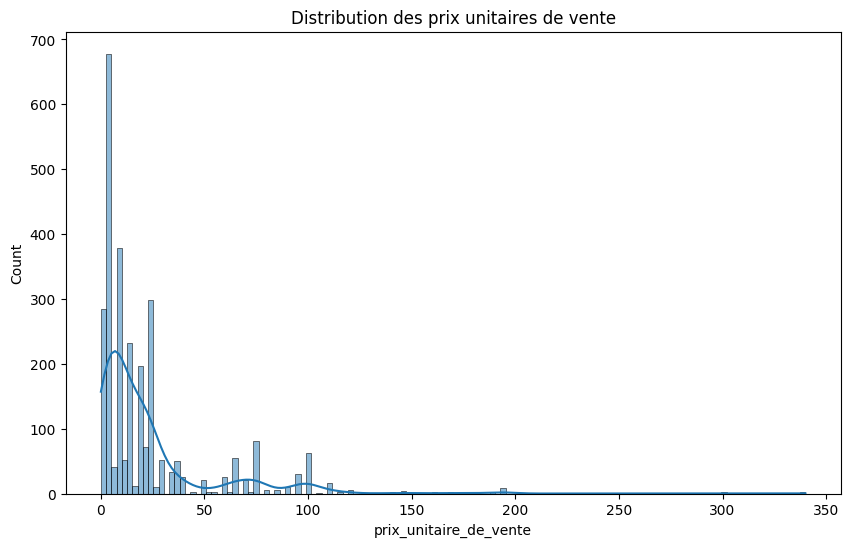

In [625]:
# Visualisation des distributions de variables quantitatives
plt.figure(figsize=(10, 6))
sns.histplot(data['prix_unitaire_de_vente'].astype(float), kde=True)
plt.title('Distribution des prix unitaires de vente')
plt.show()

In [626]:
# Affichage des résultats
print("Valeurs manquantes :\n") 
missing_values

Valeurs manquantes :



code_vente                0
date_vente                0
nom_de_la_piece           0
quantite                  0
prix_unitaire_de_vente    0
prix_total_de_vente       0
dtype: int64

In [627]:
print("\nStatistiques descriptives :\n")
statistics


Statistiques descriptives :



,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
count,2802,2802,2802,2802.000000,2802.000000,2802.000000
unique,2764,NaN,237,NaN,NaN,NaN
top,17022022/4,NaN,AMORTISSEUR AR CARINA/COROLLA/T.I./CIKUMI,NaN,NaN,NaN
freq,2,NaN,220,NaN,NaN,NaN
mean,NaN,2022-06-28 11:42:31.605995520,NaN,2.945753,22.940150,33.935646
min,NaN,2021-03-01 00:00:00,NaN,1.000000,0.000000,0.000000
25%,NaN,2022-04-02 00:00:00,NaN,1.000000,5.000000,6.000000
50%,NaN,2022-06-30 00:00:00,NaN,1.000000,12.000000,20.000000
75%,NaN,2022-09-28 00:00:00,NaN,2.000000,23.000000,46.000000
max,NaN,2022-12-31 00:00:00,NaN,240.000000,340.000000,870.300000


## Segmentation et analyse des produits

In [628]:
# Segmentation des produits par la quantité vendue
segmentation = data.groupby('nom_de_la_piece').agg({'quantite': 'sum'}).sort_values(by='quantite', ascending=False)[:50]

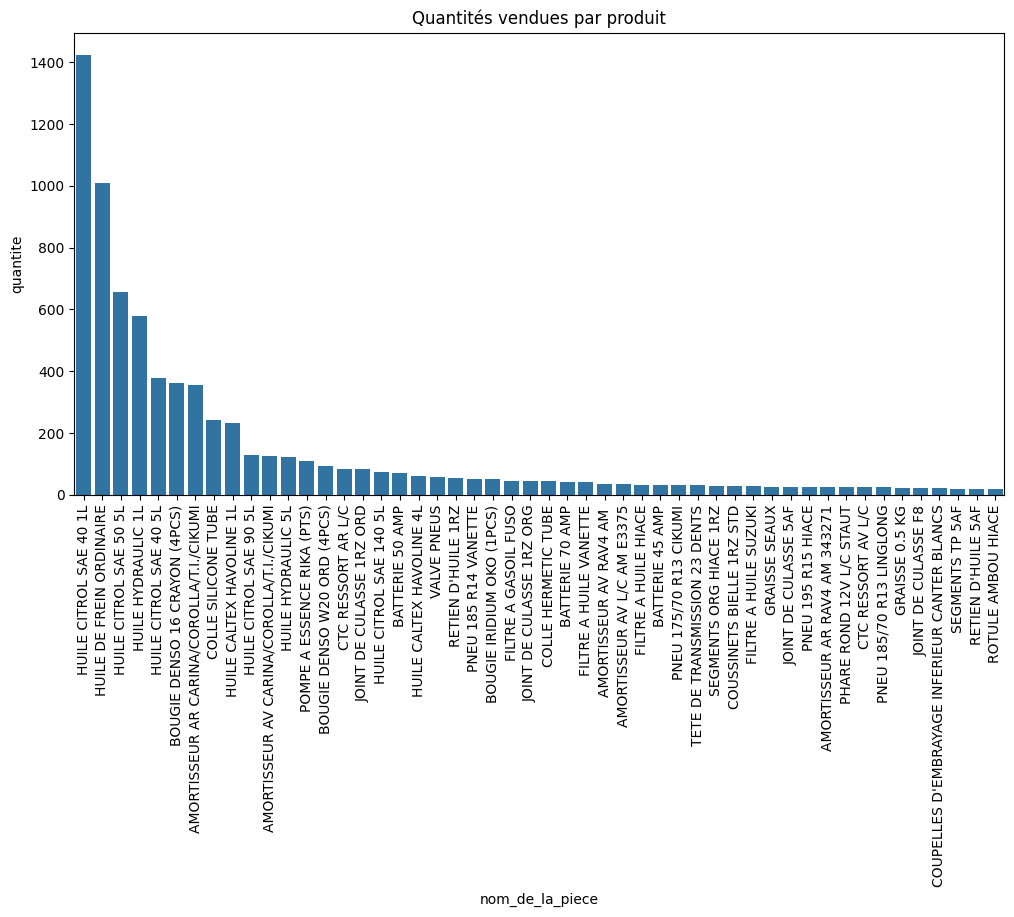

In [629]:
# Visualisation des meilleures ventes
plt.figure(figsize=(12, 6))
sns.barplot(x=segmentation.index, y=segmentation['quantite'])
plt.xticks(rotation=90)
plt.title('Quantités vendues par produit')
plt.show()

## Modelisation prédictive des ventes futures

In [630]:
# Préparation des données pour la régression (encodage des variables catégorielles)
labelencoder = LabelEncoder()
data['nom_de_la_piece'] = labelencoder.fit_transform(data['nom_de_la_piece'])

In [631]:
# Séparation des données en caractéristiques (X) et cible (y)
X = data[['nom_de_la_piece', 'quantite', 'prix_unitaire_de_vente']].astype(float)
y = data['prix_total_de_vente'].astype(float)

In [632]:
# Division des données pour l'entraînement et le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [633]:
# Entraînement du modèle XGBoost
model = XGBRegressor(booster='gblinear')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [634]:
# Prédictions
y_pred = model.predict(X_test)

In [635]:
y_pred

array([ 9.94575787e+00,  1.25337896e+01,  3.06027050e+01,  1.25142841e+01,
        3.33722687e+01,  1.98656387e+01,  6.51768646e+01,  1.49306688e+01,
        6.92287159e+00,  9.12857246e+00,  2.48948345e+01,  3.32222504e+02,
        8.62998276e+01,  8.67514038e+00,  2.45062981e+01,  8.63240662e+01,
        8.60200806e+01,  7.08780766e+00,  7.65002537e+00,  1.08161781e+02,
        1.54841385e+01,  5.00329971e+00,  2.49917870e+01,  9.08009529e+00,
        3.27530060e+01,  1.12976284e+01,  2.77128754e+01,  3.52918434e+01,
        6.54125881e+00,  1.77133579e+01,  2.94583855e+01,  3.79276352e+01,
        7.11677933e+00,  1.09773354e+02,  1.91738358e+01,  5.41535330e+00,
        1.68843079e+01,  8.20750999e+00,  5.71094799e+00,  8.97285690e+01,
        1.77133579e+01,  8.20750999e+00,  1.24358892e+01,  2.94864235e+01,
        3.21539688e+01,  2.98748322e+01,  5.71094799e+00,  2.97496262e+01,
        4.07815666e+01,  2.57674179e+01,  8.63240662e+01,  1.44971056e+01,
        1.77133579e+01,  

In [637]:
print(model.get_xgb_params()['booster'])

gblinear


In [638]:
model.coef_

array([-0.0242385,  3.4045   ,  1.0931   ])

In [639]:
model.intercept_

array([-32.6335], dtype=float32)

In [640]:
print(X_test.shape)
print(y_test.shape)

(561, 3)
(561,)


In [641]:
training_data_prediction = model.predict(X_train)

In [642]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [643]:
print('Valeur R² = ', r2_train)

Valeur R² =  0.7412134323814068


In [644]:
print(X_train.columns)  # Colonnes des données d'entraînement
print(X_test.columns)   # Colonnes des données de test

Index(['nom_de_la_piece', 'quantite', 'prix_unitaire_de_vente'], dtype='object')
Index(['nom_de_la_piece', 'quantite', 'prix_unitaire_de_vente'], dtype='object')


In [645]:
test_data_prediction = model.predict(X_test)

In [646]:
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [647]:
print('Valeur R² = ', r2_test)

Valeur R² =  0.8524198693510635


## Prédiction des ventes

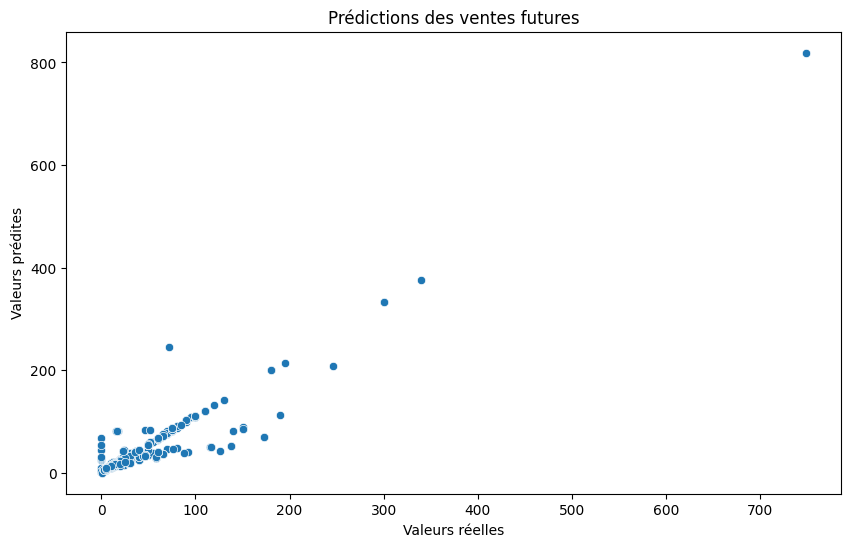

In [648]:
# Comparaison des valeurs réelles et prédites
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Prédictions des ventes futures')
plt.show()

In [649]:
# Calcul des métriques d'évaluation
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 10.255923830447138


## Interpretation et communication des résultats

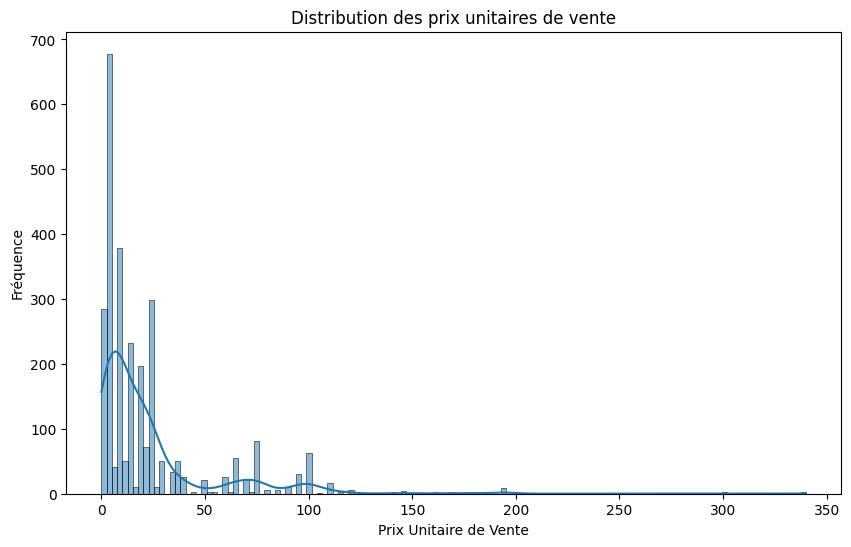

In [650]:
# Distribution des prix unitaire de vente
plt.figure(figsize=(10, 6))
sns.histplot(data['prix_unitaire_de_vente'].astype(float), kde=True)
plt.title('Distribution des prix unitaires de vente')
plt.xlabel('Prix Unitaire de Vente')
plt.ylabel('Fréquence')
plt.show()

In [651]:
# Segmentation des produits par la quantité vendue
segmentation = data.groupby('nom_de_la_piece').agg({'quantite': 'sum'}).sort_values(by='quantite', ascending=False)[:50]
# segmentation = data.groupby('nom_de_la_piece').agg({'quantite': 'sum'}).sort_values(by='quantite', ascending=False)[:5]

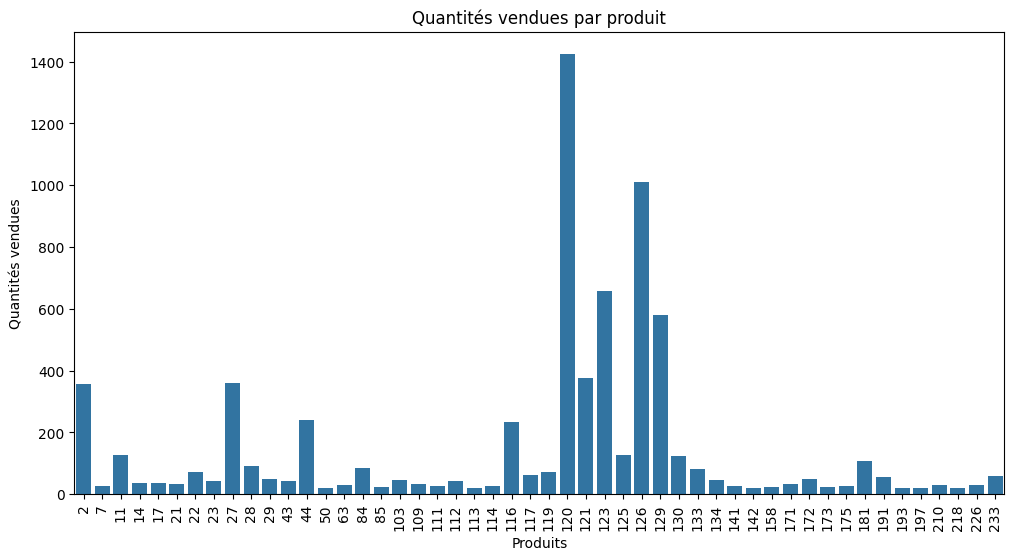

In [652]:
# Visualisation des meilleures ventes
plt.figure(figsize=(12, 6))
sns.barplot(x=segmentation.index, y=segmentation['quantite'])
plt.xticks(rotation=90)
plt.title('Quantités vendues par produit')
plt.xlabel('Produits')
plt.ylabel('Quantités vendues')
plt.show()

In [653]:
# Conversion de 'date_vente' en format datetime
data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d/%m/%Y')

In [654]:
# Agrégation des ventes par jour
ventes_par_jour = data.groupby('date_vente').agg({'prix_total_de_vente': 'sum'})

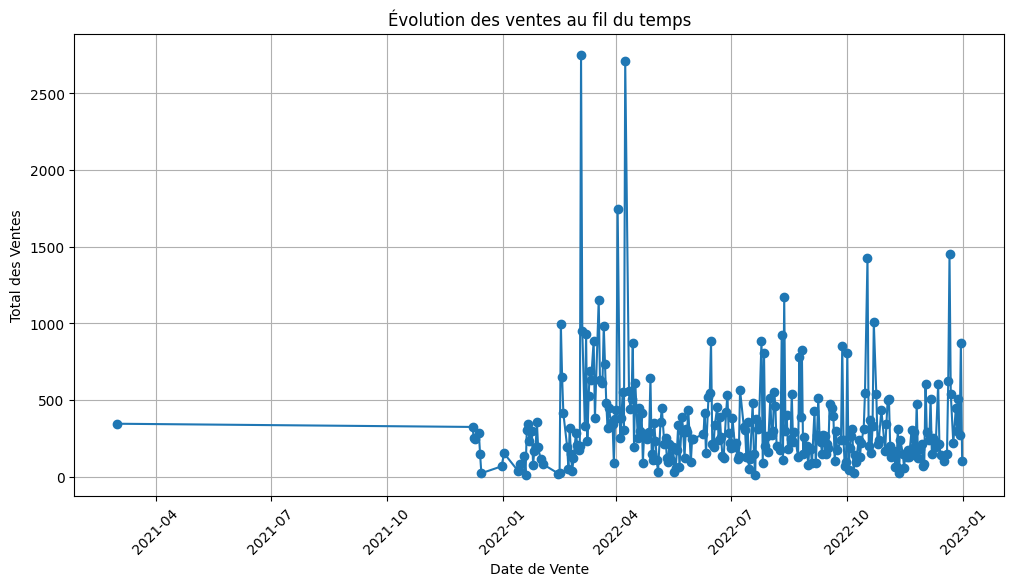

In [655]:
# Visualisation de l'évolution des ventes
plt.figure(figsize=(12, 6))
plt.plot(ventes_par_jour.index, ventes_par_jour['prix_total_de_vente'], marker='o')
plt.title('Évolution des ventes au fil du temps')
plt.xlabel('Date de Vente')
plt.ylabel('Total des Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [657]:
# Segmentation des produits par la quantité vendue
segmentation = data.groupby('nom_de_la_piece').agg({'quantite': 'sum'}).sort_values(by='quantite', ascending=False)[:10]

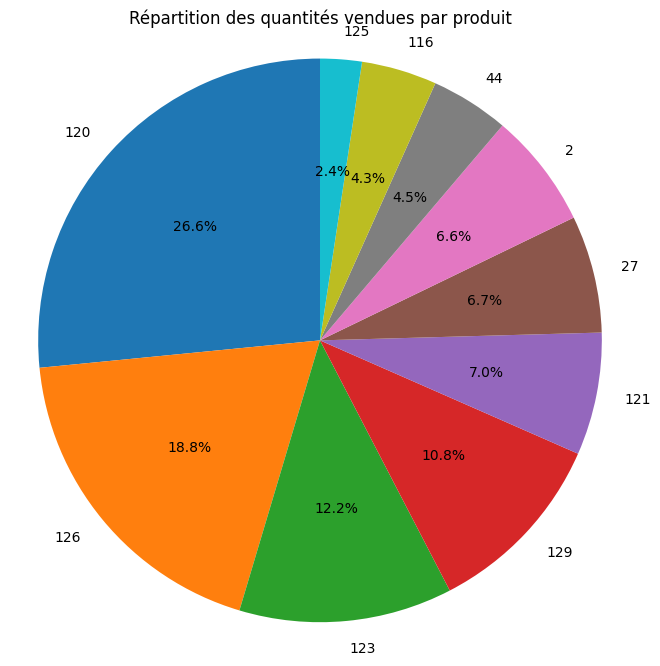

In [658]:
# Visualisation des parts de marché par produit
plt.figure(figsize=(8, 8))
plt.pie(segmentation['quantite'], labels=segmentation.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des quantités vendues par produit')
plt.axis('equal')  # Assure que le graphique est un cercle
plt.show()

In [659]:
# Prédictions des ventes (exemple après modélisation)
y_pred = model.predict(X_test)

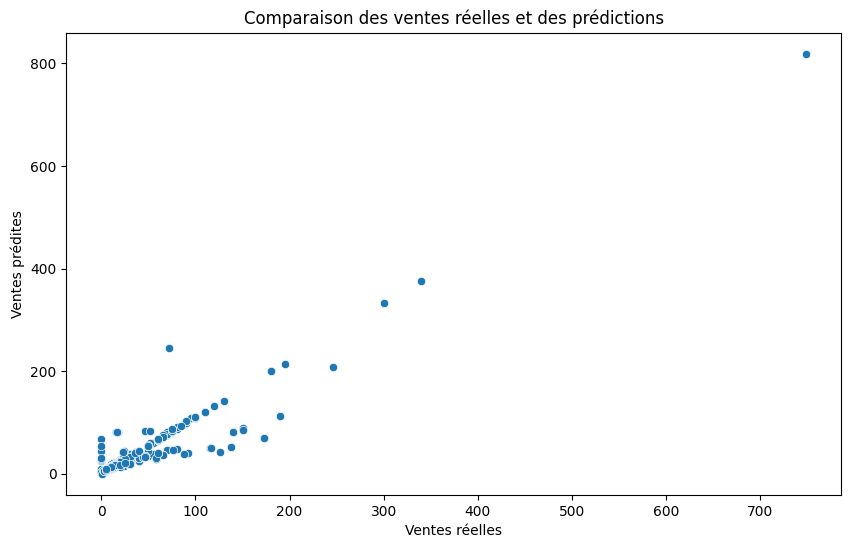

In [662]:
# Comparaison des valeurs réelles et prédites
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Ventes réelles')
plt.ylabel('Ventes prédites')
plt.title('Comparaison des ventes réelles et des prédictions')
plt.show()

In [663]:
data.loc[0, 'nom_de_la_piece']

123

In [664]:
# 1. Sélectionner un article spécifique pour prédiction
article = data.loc[0, 'nom_de_la_piece']
data_article = data[data['nom_de_la_piece'] == article]
# data_article = data

In [665]:
data_article

,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
0,08122021/1,2021-12-08,123,6,8.67,52.02
4,08122021/5,2021-12-08,123,6,8.67,52.02
13,08122021/14,2021-12-08,123,6,8.67,52.02
19,09122021/5,2021-12-09,123,6,8.67,52.02
34,10122021/11,2021-12-10,123,1,0.00,0.00
...,...,...,...,...,...,...
2038,27082022/5,2022-08-27,123,3,9.60,28.80
2051,28082022/9,2022-08-28,123,12,9.60,115.20
2068,01092022/6,2022-09-01,123,6,9.60,57.60
2250,27092022/1,2022-09-27,123,12,9.67,116.04


In [666]:
# 2. Convertir la colonne 'date_vente' en format datetime si ce n'est pas déjà fait
data_article['date_vente'] = pd.to_datetime(data_article['date_vente'], format='%d/%m/%Y')

C:\Users\CHRIS MG\AppData\Local\Temp\ipykernel_6512\2910341153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_article['date_vente'] = pd.to_datetime(data_article['date_vente'], format='%d/%m/%Y')


In [667]:
# 3. Organiser les données pour la modélisation en triant par date
data_article = data_article.sort_values(by='date_vente')

In [668]:
data_article['date_vente'] = data_article['date_vente'].fillna(pd.Timestamp('2000-01-01'))

In [669]:
data_article = data_article.dropna(subset=['date_vente'])

In [670]:
# 4. Préparation des variables X et y (ici on prévoit les ventes en fonction de la date)
data_article['date_vente_ordinal'] = data_article['date_vente'].apply(lambda x: x.toordinal())  # Conversion en ordonnée temporelle

In [671]:
data_article['date_vente'] = pd.to_datetime(data_article['date_vente'], errors='coerce')  # Cela convertit tout en datetime

In [672]:
XX = data_article[['date_vente_ordinal']]  # La date sous forme numérique
YY = data_article['prix_total_de_vente'].astype(float)  # Les ventes totales

In [673]:
XX

,date_vente_ordinal
0,738132
4,738132
13,738132
19,738133
34,738134
...,...
2051,738395
2068,738399
2250,738425
2251,738425


In [674]:
YY

0        52.02
4        52.02
13       52.02
19       52.02
34        0.00
         ...  
2051    115.20
2068     57.60
2250    116.04
2251    116.04
251       0.00
Name: prix_total_de_vente, Length: 101, dtype: float64

In [675]:
# 5. Séparer les données en entraînement et test
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.2, random_state=0)

In [677]:
# 6. Entraîner le modèle (XGBoost par exemple)
model = XGBRegressor()
model.fit(XX_train, YY_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [678]:
# 7. Faire des prédictions sur les dates test
YY_pred = model.predict(XX_test)

In [682]:
# 8. Générer une série de dates futures pour la prédiction
future_dates = pd.date_range(data_article['date_vente'].max(), periods=30)  # Prédire pour les 30 prochains jours
future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)

In [683]:
# 9. Faire des prédictions sur les dates futures
future_predictions = model.predict(future_dates_ordinal)

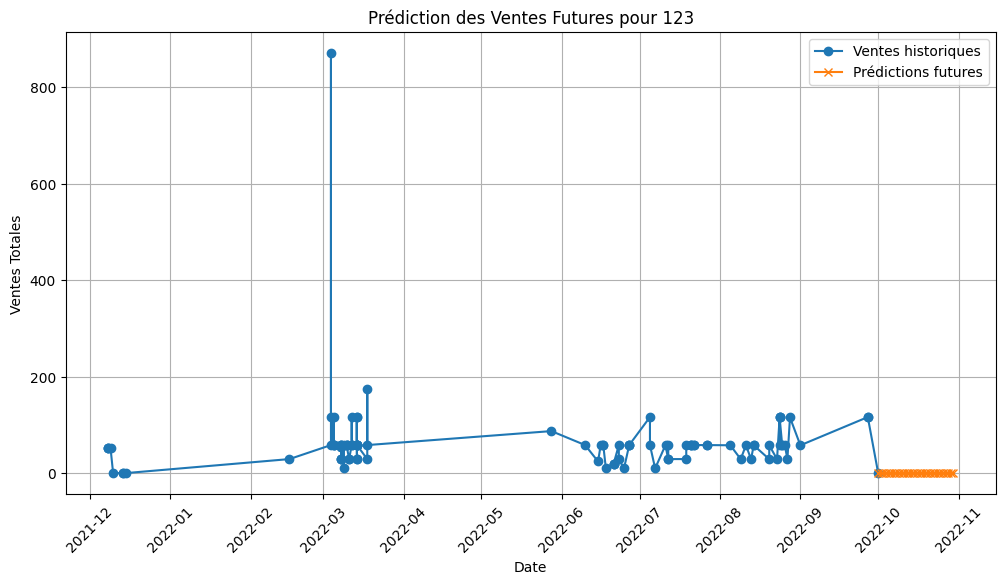

In [684]:
# 10. Visualisation des ventes historiques et prédictions futures
plt.figure(figsize=(12, 6))
# Tracé des ventes historiques
plt.plot(data_article['date_vente'], data_article['prix_total_de_vente'], label='Ventes historiques', marker='o')
# Tracé des prédictions sur les dates futures
plt.plot(future_dates, future_predictions, label='Prédictions futures', marker='x')
plt.xlabel('Date')
plt.ylabel('Ventes Totales')
plt.title(f'Prédiction des Ventes Futures pour {article}')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [685]:
# Cleaning the date_vente column, filling missing dates if needed, and converting it to datetime
data['date_vente'] = data['date_vente'].fillna(method='ffill')  # Fill missing dates with the previous valid date
data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d/%m/%Y')

C:\Users\CHRIS MG\AppData\Local\Temp\ipykernel_6512\684681542.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date_vente'] = data['date_vente'].fillna(method='ffill')  # Fill missing dates with the previous valid date


In [686]:
def clean_price(x):
    return float(x.replace(',', '.'))

In [688]:
# data['prix_unitaire_de_vente'] = data['prix_unitaire_de_vente'].apply(clean_price)
# data['prix_total_de_vente'] = data['prix_total_de_vente'].apply(clean_price)

In [689]:
data['mois'] = data['date_vente'].dt.month

In [690]:
chiffre_affaire = data['prix_total_de_vente'].sum()
nb_transactions = len(data)

In [691]:
date_debut = data['date_vente'].min()
date_fin = data['date_vente'].max()

In [692]:
chiffre_affaire, nb_transactions, date_debut, date_fin

(95087.68,
 2802,
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2022-12-31 00:00:00'))

In [693]:
data['date_vente'] = data['date_vente'].astype(str)

In [694]:
problematic_dates = data[data['date_vente'].str.match(r'^\d{2}/\d{2}/\d{4}$', na=False)]

In [695]:
# Correcting the problematic dates by filling missing year or invalid dates with plausible ones
# For now, we'll assume "201" meant "2019" and "021" meant "2021"

# Fixing entries with "201" as year
data['date_vente'] = data['date_vente'].replace({'12/16/201': '16/12/2019', '30/12/021': '30/12/2021'})

# Now converting the date to the correct format
data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d/%m/%Y', errors='coerce')

# Recheck for any remaining NaT values in date_vente column
missing_dates = data[data['date_vente'].isna()]

In [696]:
data = data.dropna(subset=['date_vente'])

In [697]:
data.head(), data.dtypes

(Empty DataFrame
 Columns: [code_vente, date_vente, nom_de_la_piece, quantite, prix_unitaire_de_vente, prix_total_de_vente, mois]
 Index: [],
 code_vente                        object
 date_vente                datetime64[ns]
 nom_de_la_piece                    int32
 quantite                           int64
 prix_unitaire_de_vente           float64
 prix_total_de_vente              float64
 mois                               int32
 dtype: object)

In [698]:
data['date_vente'] = data['date_vente'].replace({'12/16/201': '16/12/2019', '30/12/021': '30/12/2021'})


In [699]:
data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d/%m/%Y', errors='coerce')

In [700]:
data = data.dropna(subset=['date_vente'])

C:\Users\CHRIS MG\AppData\Local\Temp\ipykernel_6512\3921679566.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('date_vente').resample('M').sum()['prix_total_de_vente'].plot(figsize=(10,6))


ValueError: zero-size array to reduction operation fmin which has no identity

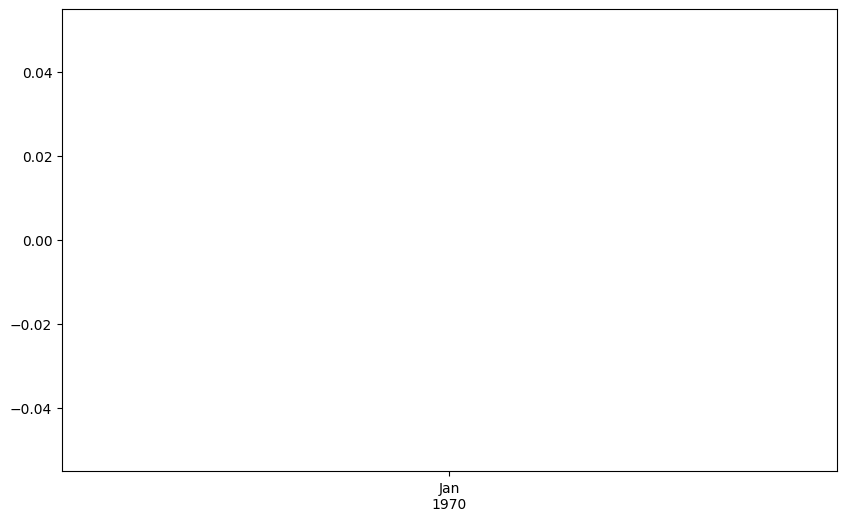

In [701]:
data.set_index('date_vente').resample('M').sum()['prix_total_de_vente'].plot(figsize=(10,6))
plt.title('EVOLUTION DES VENTES DANS LE TEMPS')
plt.xlabel('TEMPS')
plt.ylabel('VENTES TOTALES')
plt.show()

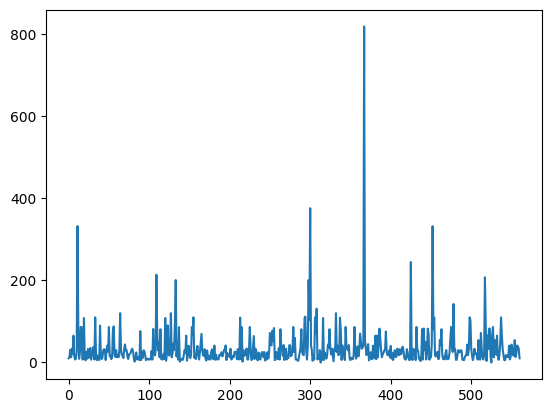

In [702]:
plt.plot(y_pred)

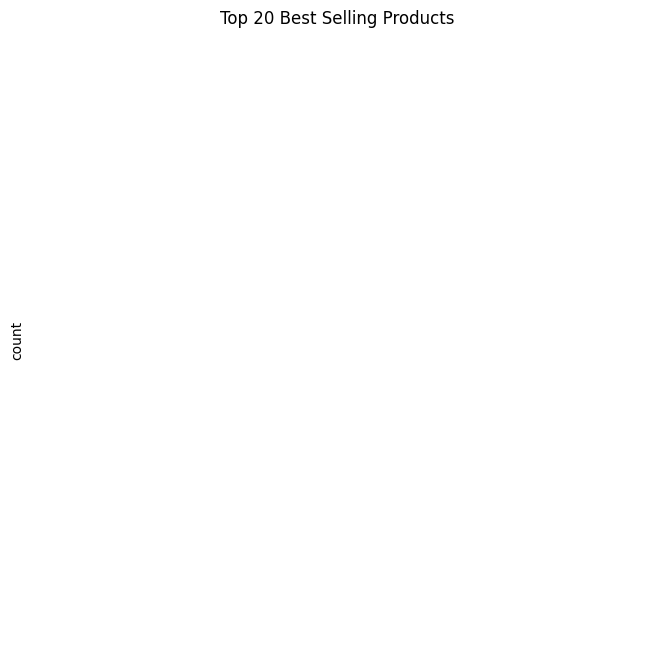

In [703]:
top_products = data['nom_de_la_piece'].value_counts().head(20)
top_products.plot.pie(autopct='%1.1f%%', figsize=(8,8), colors=sns.color_palette('Set2'))
plt.title('Top 20 Best Selling Products')
plt.show()

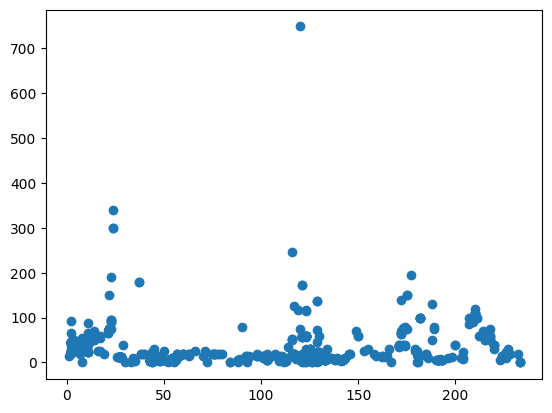

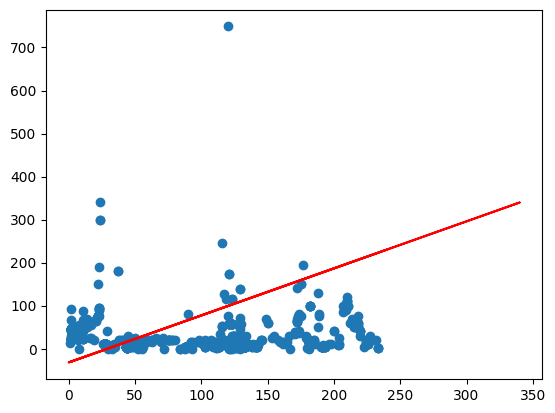

In [704]:
X_test = np.array(X_test)
y_test = np.array(y_test)
plt.scatter(X_test[:, 0], y_test)
plt.show()
# array([-0.0242385,  3.4045   ,  1.0931   ])
plt.scatter(X_test[:, 0], y_test)
plt.plot(X_test, -32.0022 + 1.0931 * X_test, 'r')
plt.show()